<a href="https://colab.research.google.com/github/lulus2781/Competition---high-fatality-accidents/blob/main/datacamp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High Fatality Accidents in 2020 - Datacamp Competitions

## Load Library

In [1]:
library(tidyverse)
library(DataExplorer)
library(esquisse)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/lulus2781/Competition---high-fatality-accidents/main/accident-data.csv"
df <- read.csv(url)
head(df)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020010219808,2020,10219808,-0.254001,51.46226,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
2,2020010220496,2020,10220496,-0.139253,51.47033,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
3,2020010228005,2020,10228005,-0.178719,51.52961,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
4,2020010228006,2020,10228006,-0.001683,51.54121,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
5,2020010228011,2020,10228011,-0.137592,51.51570,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1
6,2020010228012,2020,10228012,-0.025880,51.47628,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,1,0,0,1


In [3]:
df2 <- read.csv("https://raw.githubusercontent.com/lulus2781/Competition---high-fatality-accidents/main/road-safety-lookups.csv")
head(df2)

,table,field.name,code.format,label,note
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Accident,accident_index,,,unique value for each accident. The accident_index combines the accident_year and accident_ref_no to form a unique ID. It can be used to join to Vehicle and Casualty
2,Accident,accident_year,,,
3,Accident,accident_reference,,,"In year id used by the police to reference a collision. It is not unique outside of the year, use accident_index for linking to other years"
4,Accident,longitude,,,Null if not known
5,Accident,Latitude,,,Null if not known
6,Accident,accident_severity,1,Fatal,


## Explore Data

### 1) Data Structure

In [4]:
introduce(df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
81878,27,4,23,0,32,81872,2210706,21399280


*Total missing values are 28*

In [5]:
introduce(df2)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
129,5,5,0,0,0,129,645,17168


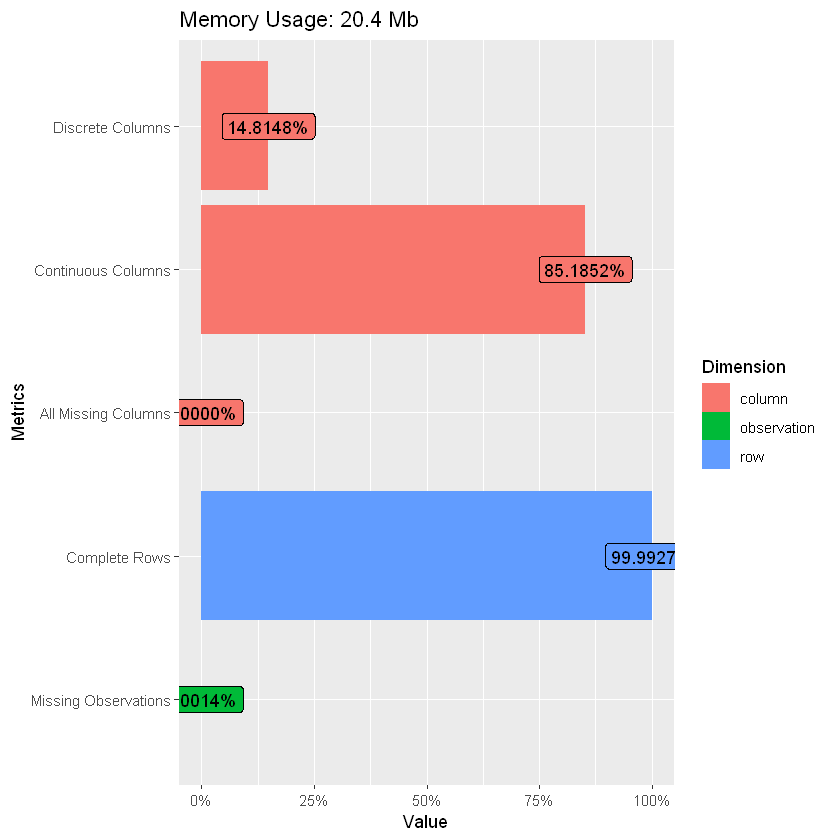

In [6]:
plot_intro(df)

*We see small amount of missing observations in "df" dataset*

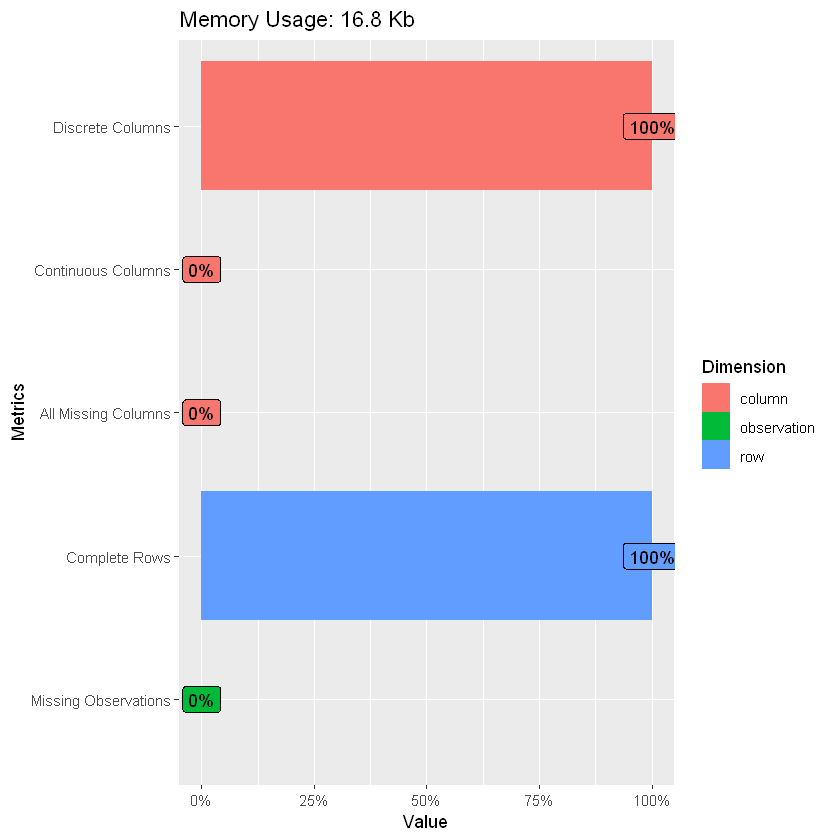

In [7]:
plot_intro(df2)

### 2) Data Variables

In [8]:
glimpse(df2)

Rows: 129
Columns: 5
$ table       <chr> "Accident", "Accident", "Accident", "Accident", "Accident"~
$ field.name  <chr> "accident_index", "accident_year", "accident_reference", "~
$ code.format <chr> "", "", "", "", "", "1", "2", "3", "", "", "(DD/MM/YYYY)",~
$ label       <chr> "", "", "", "", "", "Fatal", "Serious", "Slight", "", "", ~
$ note        <chr> "unique value for each accident. The accident_index combin~


In [9]:
df2$field.name

[1] "accident_index"                         
  [2] "accident_year"                          
  [3] "accident_reference"                     
  [4] "longitude"                              
  [5] "Latitude"                               
  [6] "accident_severity"                      
  [7] "accident_severity"                      
  [8] "accident_severity"                      
  [9] "number_of_vehicles"                     
 [10] "number_of_casualties"                   
 [11] "date"                                   
 [12] "day_of_week"                            
 [13] "day_of_week"                            
 [14] "day_of_week"                            
 [15] "day_of_week"                            
 [16] "day_of_week"                            
 [17] "day_of_week"                            
 [18] "day_of_week"                            
 [19] "time"                                   
 [20] "first_road_class"                       
 [21] "first_road_class"                       
 [22] "first_road_class"                       
 [23] "first_road_class"                       
 [24] "first_road_class"                       
 [25] "first_road_class"                       
 [26] "first_road_number"                      
 [27] "first_road_number"                      
 [28] "first_road_number"                      
 [29] "road_type"                              
 [30] "road_type"                              
 [31] "road_type"                              
 [32] "road_type"                              
 [33] "road_type"                              
 [34] "road_type"                              
 [35] "road_type"                              
 [36] "road_type"                              
 [37] "speed_limit"                            
 [38] "speed_limit"                            
 [39] "speed_limit"                            
 [40] "junction_detail"                        
 [41] "junction_detail"                        
 [42] "junction_detail"                        
 [43] "junction_detail"                        
 [44] "junction_detail"                        
 [45] "junction_detail"                        
 [46] "junction_detail"                        
 [47] "junction_detail"                        
 [48] "junction_detail"                        
 [49] "junction_detail"                        
 [50] "junction_detail"                        
 [51] "junction_control"                       
 [52] "junction_control"                       
 [53] "junction_control"                       
 [54] "junction_control"                       
 [55] "junction_control"                       
 [56] "junction_control"                       
 [57] "junction_control"                       
 [58] "second_road_class"                      
 [59] "second_road_class"                      
 [60] "second_road_class"                      
 [61] "second_road_class"                      
 [62] "second_road_class"                      
 [63] "second_road_class"                      
 [64] "second_road_class"                      
 [65] "second_road_number"                     
 [66] "second_road_number"                     
 [67] "second_road_number"                     
 [68] "pedestrian_crossing_human_control"      
 [69] "pedestrian_crossing_human_control"      
 [70] "pedestrian_crossing_human_control"      
 [71] "pedestrian_crossing_human_control"      
 [72] "pedestrian_crossing_human_control"      
 [73] "pedestrian_crossing_physical_facilities"
 [74] "pedestrian_crossing_physical_facilities"
 [75] "pedestrian_crossing_physical_facilities"
 [76] "pedestrian_crossing_physical_facilities"
 [77] "pedestrian_crossing_physical_facilities"
 [78] "pedestrian_crossing_physical_facilities"
 [79] "pedestrian_crossing_physical_facilities"
 [80] "pedestrian_crossing_physical_facilities"
 [81] "light_conditions"                       
 [82] "light_conditions"                       
 [83] "light_conditions"                       
 [84] "light_condi

In [10]:
print(df2)

       table                              field.name  code.format
1   Accident                          accident_index             
2   Accident                           accident_year             
3   Accident                      accident_reference             
4   Accident                               longitude             
5   Accident                                Latitude             
6   Accident                       accident_severity            1
7   Accident                       accident_severity            2
8   Accident                       accident_severity            3
9   Accident                      number_of_vehicles             
10  Accident                    number_of_casualties             
11  Accident                                    date (DD/MM/YYYY)
12  Accident                             day_of_week            1
13  Accident                             day_of_week            2
14  Accident                             day_of_week            3
15  Accide

In [11]:
df2 %>% group_by(label=="Fatal")

table,field.name,code.format,label,note,"label == ""Fatal"""
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
Accident,accident_index,,,unique value for each accident. The accident_index combines the accident_year and accident_ref_no to form a unique ID. It can be used to join to Vehicle and Casualty,FALSE
Accident,accident_year,,,,FALSE
Accident,accident_reference,,,"In year id used by the police to reference a collision. It is not unique outside of the year, use accident_index for linking to other years",FALSE
Accident,longitude,,,Null if not known,FALSE
Accident,Latitude,,,Null if not known,FALSE
Accident,accident_severity,1,Fatal,,TRUE
Accident,accident_severity,2,Serious,,FALSE
Accident,accident_severity,3,Slight,,FALSE
Accident,number_of_vehicles,,,,FALSE


In [12]:
severity_1 <- df %>% filter(accident_severity==1)
head(severity_1)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020010228038,2020,10228038,0.207510,51.59330,1,1,1,01/01/2020,4,...,6,0,0,0,4,7,2,0,0,2
2,2020010228301,2020,10228301,-0.430454,51.44158,1,1,1,02/01/2020,5,...,6,0,0,0,4,1,1,0,0,2
3,2020010228334,2020,10228334,-0.420010,51.54863,1,2,1,03/01/2020,6,...,6,0,0,0,6,2,2,0,0,1
4,2020010229060,2020,10229060,-0.070962,51.47336,1,1,1,08/01/2020,4,...,6,0,0,5,1,1,1,0,0,1
5,2020010229841,2020,10229841,-0.171763,51.47003,1,2,1,11/01/2020,7,...,5,0,0,5,4,1,1,0,0,1
6,2020010231463,2020,10231463,-0.050507,51.47118,1,3,2,19/01/2020,1,...,6,0,0,0,1,1,1,0,0,1


*Accident severity code format = 1 , labeled as Fatal Accidents*

In [13]:
esquisse::esquisser(severity_1)

Warning message:
"Esquisse may not work properly, try updating RStudio."
Loading required package: shiny


Listening on http://127.0.0.1:3030



### 1.  What time of day and day of the week do most serious accidents happen?

Warning message:
"Removed 2 rows containing missing values (geom_bar)."


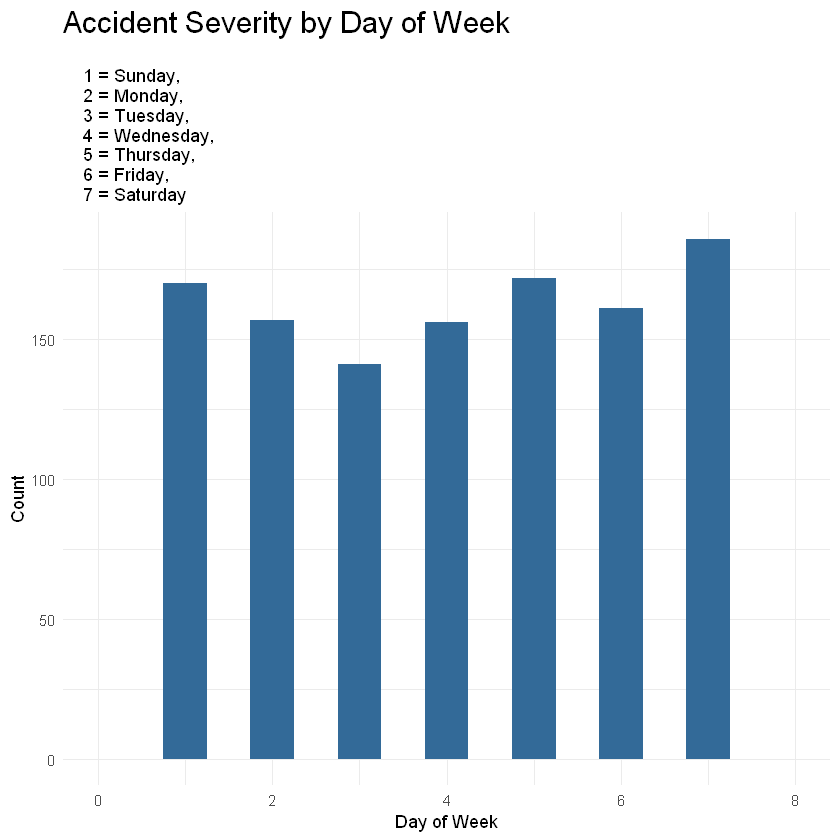

In [14]:
ggplot(severity_1) +
  aes(x = day_of_week, fill = accident_severity) +
  geom_histogram(bins = 17L) +
  scale_fill_gradient(low = "#132B43", high = "#56B1F7") +
  labs(
    x = "Day of Week",
    y = "Count",
    title = "Accident Severity by Day of Week",
    subtitle = "
    1 = Sunday,
    2 = Monday,
    3 = Tuesday,
    4 = Wednesday,
    5 = Thursday,
    6 = Friday,
    7 = Saturday"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 18L)
  ) +
  xlim(0, 8)

### 2.  Are there any patterns in the time of day/ day of the week when serious accidents occur?

In [28]:
glimpse(severity_1)

Rows: 1,143
Columns: 27
$ accident_index                          <chr> "2020010228038", "202001022830~
$ accident_year                           <int> 2020, 2020, 2020, 2020, 2020, ~
$ accident_reference                      <chr> "10228038", "10228301", "10228~
$ longitude                               <dbl> 0.207510, -0.430454, -0.420010~
$ latitude                                <dbl> 51.59330, 51.44158, 51.54863, ~
$ accident_severity                       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ number_of_vehicles                      <int> 1, 1, 2, 1, 2, 3, 1, 3, 2, 1, ~
$ number_of_casualties                    <int> 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, ~
$ date                                    <chr> "01/01/2020", "02/01/2020", "0~
$ day_of_week                             <int> 4, 5, 6, 4, 7, 1, 3, 3, 5, 1, ~
$ time                                    <chr> "04:30", "21:00", "06:15", "12~
$ first_road_class                        <int> 3, 5, 3, 3, 3, 6, 3, 3, 3, 5, ~
$ first_road_num

In [30]:
cor1 <- severity_1 %>% select(c( ,-1:-5))

In [31]:
head(cor1)

,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,01/01/2020,4,04:30,3,12,3,50,...,6,0,0,0,4,7,2,0,0,2
2,1,1,1,02/01/2020,5,21:00,5,0,6,40,...,6,0,0,0,4,1,1,0,0,2
3,1,2,1,03/01/2020,6,06:15,3,40,3,60,...,6,0,0,0,6,2,2,0,0,1
4,1,1,1,08/01/2020,4,12:55,3,202,6,30,...,6,0,0,5,1,1,1,0,0,1
5,1,2,1,11/01/2020,7,20:56,3,3205,3,30,...,5,0,0,5,4,1,1,0,0,1
6,1,3,2,19/01/2020,1,15:31,6,0,6,30,...,6,0,0,0,1,1,1,0,0,1


In [33]:
corrl <- cor1%>% select( ,-4 &-6)

In [34]:
library(metan)

In [35]:
corrl <- corr_coef(corrl)

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation i

In [36]:
plot(corrl)

ERROR: Error in hclust(as.dist((1 - x)/2)): NA/NaN/Inf in foreign function call (arg 10)
